In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the data set
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features
y=df['pets_allowed']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25) # 70% training and 30% test

In [4]:
#Model Building

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
svm_clf = SVC()

vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

vot_clf.fit(X_train, y_train)

for clf in(log_clf, rnd_clf, svm_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)



C:\Users\Cloud Solution\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cloud Solution\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [5]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 87.1651825626721


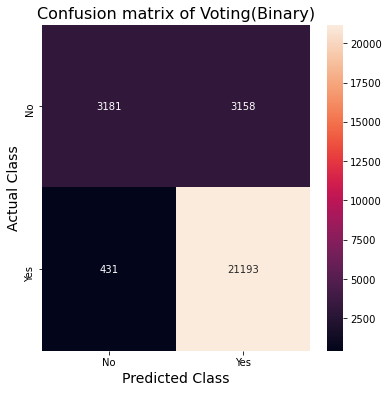

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Voting(Binary)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [10]:
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])
Actual = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])

pd.crosstab(Actual, Predicted, 
            rownames=['Predicted Class'], 
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Pet Allowed,Pet Not Allowed,Total Amount
Predicted Class,,,
Pet Allowed,21193,3158,24351
Pet Not Allowed,431,3181,3612
Total Amount,21624,6339,27963
